In [1]:
from src.nav_alg import nav_alg
import numpy as np
import math as math

In [2]:
# e.g Moscow
lat = 0#55.75
lon = 0#37.61

# file with real sensors data
data_file = "csv_data/Sensors_and_orientation.csv"

# sensor errors
acc_offset = 0.002 # 2 [mg]
gyr_drift = math.radians(10)/3600 # [deg/hour]

In [3]:
# alignemnt errors [deg]
# 0 - assuming no errors
psi = 0
teta = 0
gamma = 0

In [4]:
ideal_system = nav_alg()

acc_offset_analysis = nav_alg()
acc_offset_analysis.set_a_body(
    acc_offset,
    acc_offset,
    acc_offset
)
acc_offset_analysis.set_coordinates(lat, lon)

gyro_drift_analysis= nav_alg()
gyro_drift_analysis.set_w_body(
    gyr_drift,
    gyr_drift,
    gyr_drift
)
gyro_drift_analysis.set_coordinates(lat, lon)

In [5]:
from src.csv_parser import get_data_from_csv
SENSOR_DATA_GYR = get_data_from_csv("Gyr_X","Gyr_Y","Gyr_Z", file_name=data_file)
gyro_random_error_analysis = nav_alg(analysis="dynamic_gyro", time=1800, frequency=100)
gyro_random_error_analysis.set_coordinates(lat, lon)

SENSOR_DATA_GYR.update({ "Gyr_X":np.deg2rad(SENSOR_DATA_GYR["Gyr_X"]-np.mean(SENSOR_DATA_GYR["Gyr_X"])) })
SENSOR_DATA_GYR.update({ "Gyr_Y":np.deg2rad(SENSOR_DATA_GYR["Gyr_Y"]-np.mean(SENSOR_DATA_GYR["Gyr_Y"])) })
SENSOR_DATA_GYR.update({ "Gyr_Z":np.deg2rad(SENSOR_DATA_GYR["Gyr_Z"]-np.mean(SENSOR_DATA_GYR["Gyr_Z"])) })

gyro_random_error_analysis.sensor_data = SENSOR_DATA_GYR

In [6]:
SENSOR_DATA_ACC = get_data_from_csv("Acc_X","Acc_Y","Acc_Z", file_name=data_file)
acc_random_error_analysis = nav_alg(analysis="dynamic_acc", time=1800, frequency=100)
acc_random_error_analysis.set_coordinates(lat, lon)

SENSOR_DATA_ACC.update({ "Acc_X":(SENSOR_DATA_ACC["Acc_X"]-np.mean(SENSOR_DATA_ACC["Acc_X"])) })
SENSOR_DATA_ACC.update({ "Acc_Y":(SENSOR_DATA_ACC["Acc_Y"]-np.mean(SENSOR_DATA_ACC["Acc_Y"])) })
SENSOR_DATA_ACC.update({ "Acc_Z":(SENSOR_DATA_ACC["Acc_Z"]-np.mean(SENSOR_DATA_ACC["Acc_Z"])) })

acc_random_error_analysis.sensor_data = SENSOR_DATA_ACC

In [7]:
SENSOR_DATA = get_data_from_csv("Acc_X","Acc_Y","Acc_Z", "Gyr_X", "Gyr_Y", "Gyr_Z", file_name=data_file)
random_error_analysis = nav_alg(analysis="dynamic_both", time=1800, frequency=100)
random_error_analysis.set_coordinates(lat, lon)

SENSOR_DATA.update({ "Acc_X":(SENSOR_DATA["Acc_X"]-np.mean(SENSOR_DATA["Acc_X"])) })
SENSOR_DATA.update({ "Acc_Y":(SENSOR_DATA["Acc_Y"]-np.mean(SENSOR_DATA["Acc_Y"])) })
SENSOR_DATA.update({ "Acc_Z":(SENSOR_DATA["Acc_Z"]-np.mean(SENSOR_DATA["Acc_Z"])) })

SENSOR_DATA.update({ "Gyr_X":np.deg2rad(SENSOR_DATA["Gyr_X"]-np.mean(SENSOR_DATA["Gyr_X"])) })
SENSOR_DATA.update({ "Gyr_Y":np.deg2rad(SENSOR_DATA["Gyr_Y"]-np.mean(SENSOR_DATA["Gyr_Y"])) })
SENSOR_DATA.update({ "Gyr_Z":np.deg2rad(SENSOR_DATA["Gyr_Z"]-np.mean(SENSOR_DATA["Gyr_Z"])) })

random_error_analysis.sensor_data = SENSOR_DATA

In [8]:
import threading
    
def crete_threads_and_run_1(*objects):
    threads = []
    for object in objects:
       threads.append(threading.Thread(target=object.analysis))
    
    for thread in threads:
        thread.start()
    
    for thread in threads:
        thread.join()

crete_threads_and_run_1(
    acc_offset_analysis,
    gyro_drift_analysis,
    gyro_random_error_analysis,
    acc_random_error_analysis,
    random_error_analysis,
    ideal_system
    )

aligned with ideal matrix
aligned with ideal matrixaligned with ideal matrix

aligned with ideal matrix
aligned with ideal matrix
aligned with ideal matrix
Coordinates not seted up, going with lat: [0.], lon: [0.]


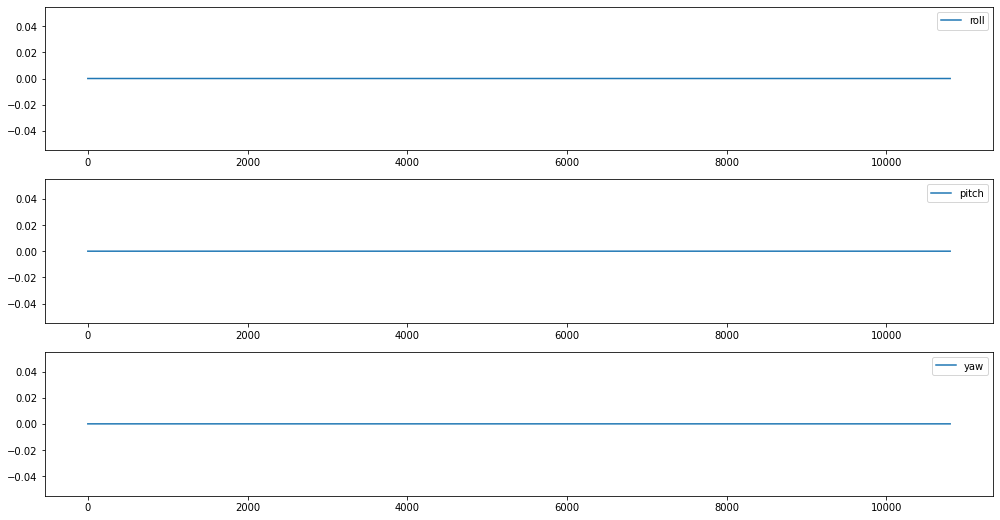

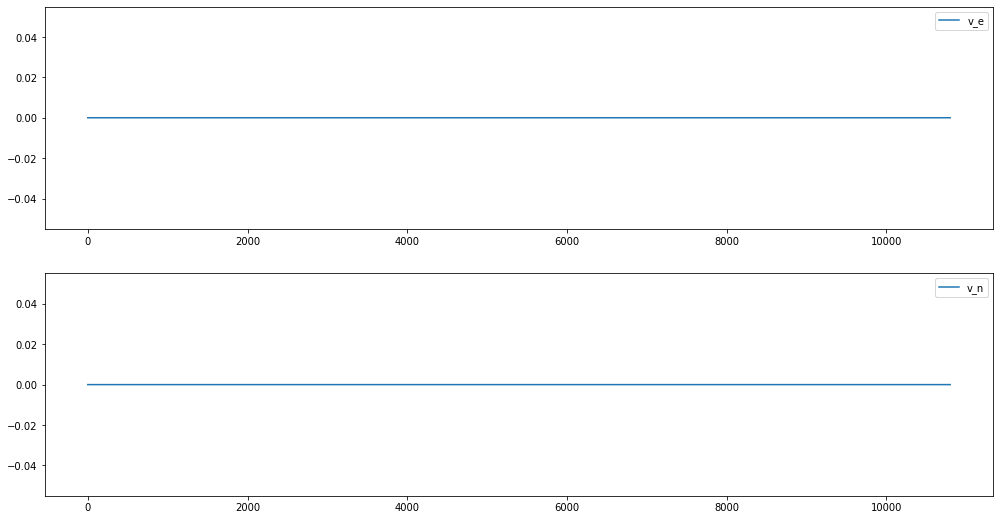

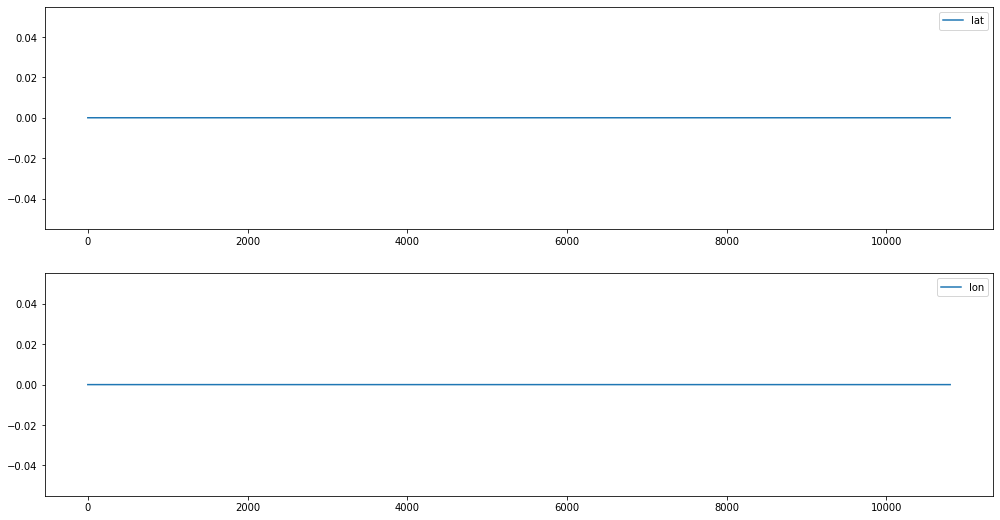

In [9]:
ideal_system.plots()

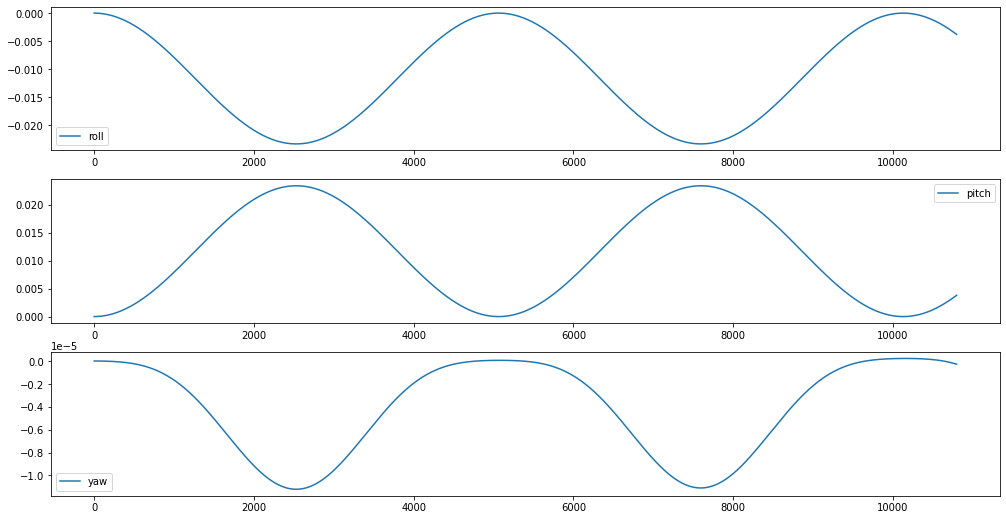

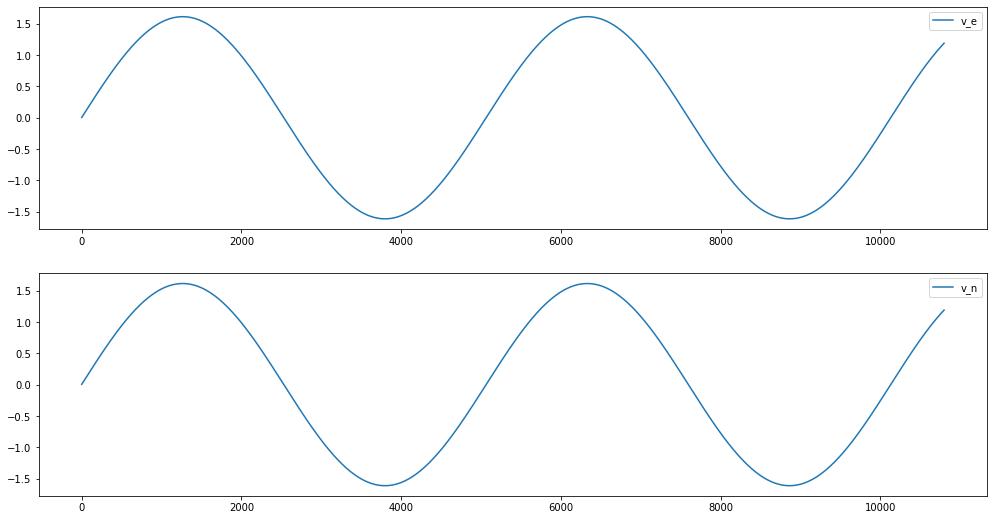

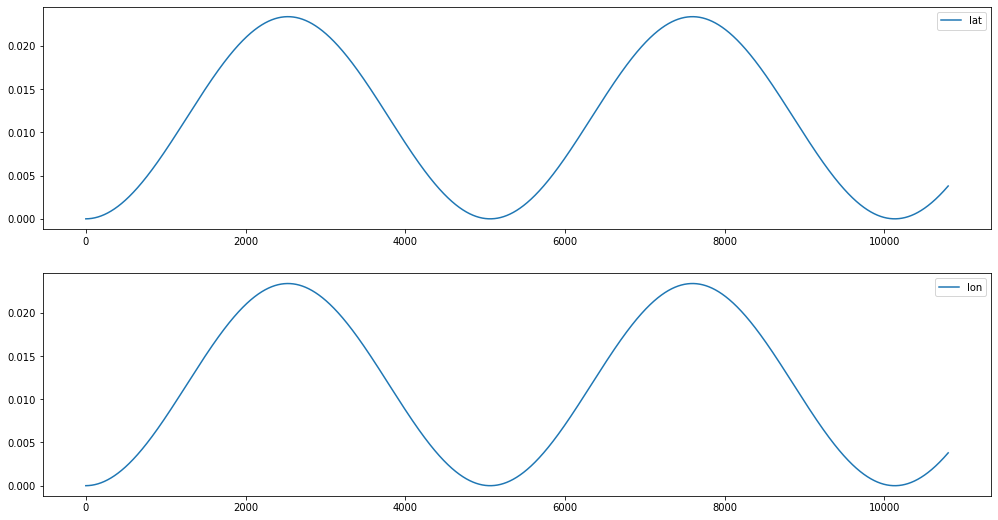

In [10]:
acc_offset_analysis.plots()

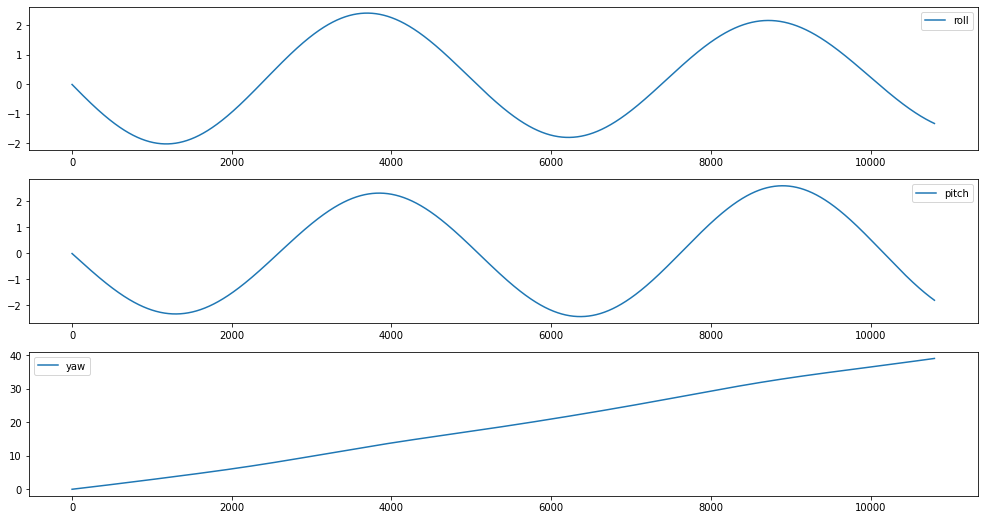

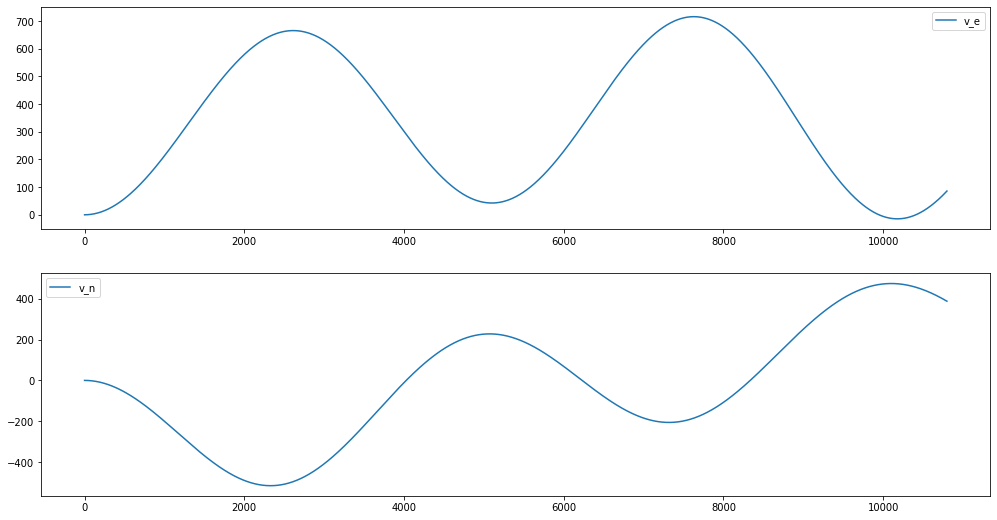

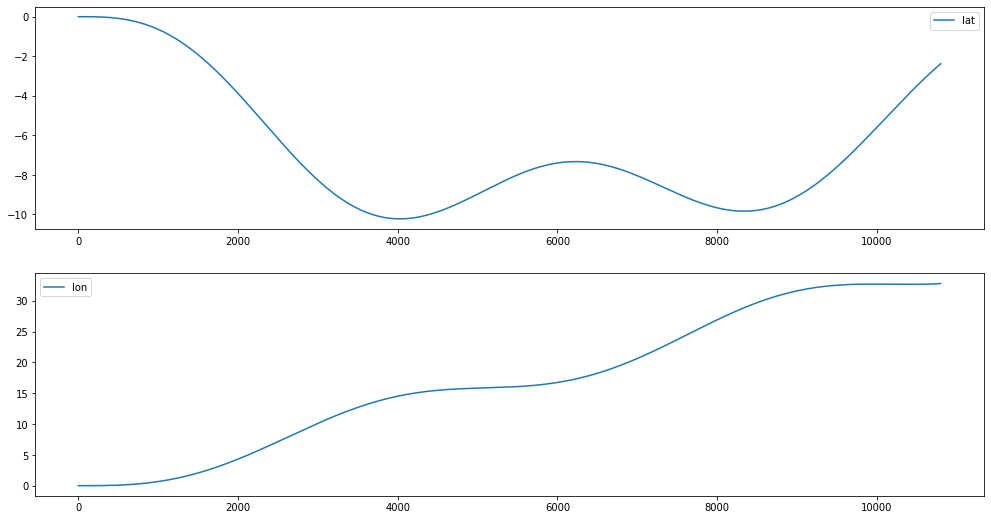

In [11]:
gyro_drift_analysis.plots()

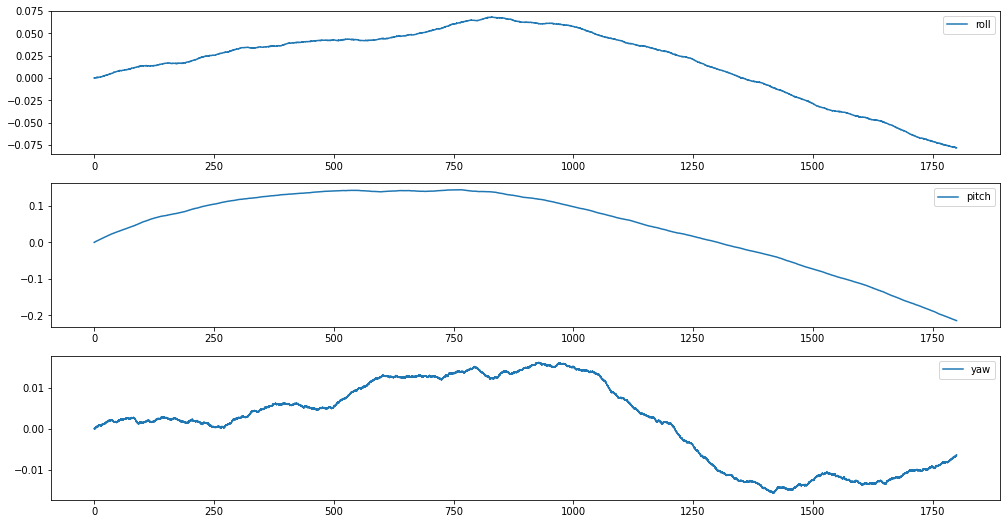

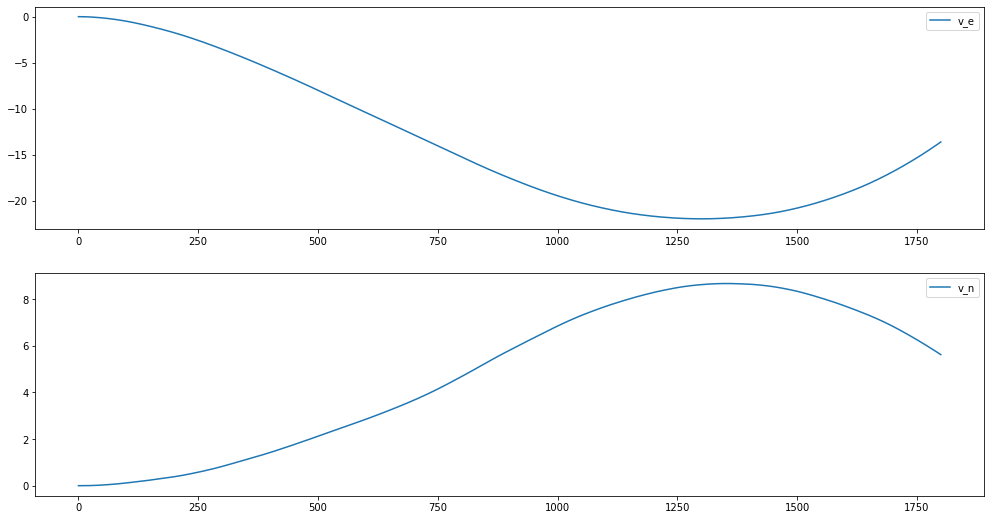

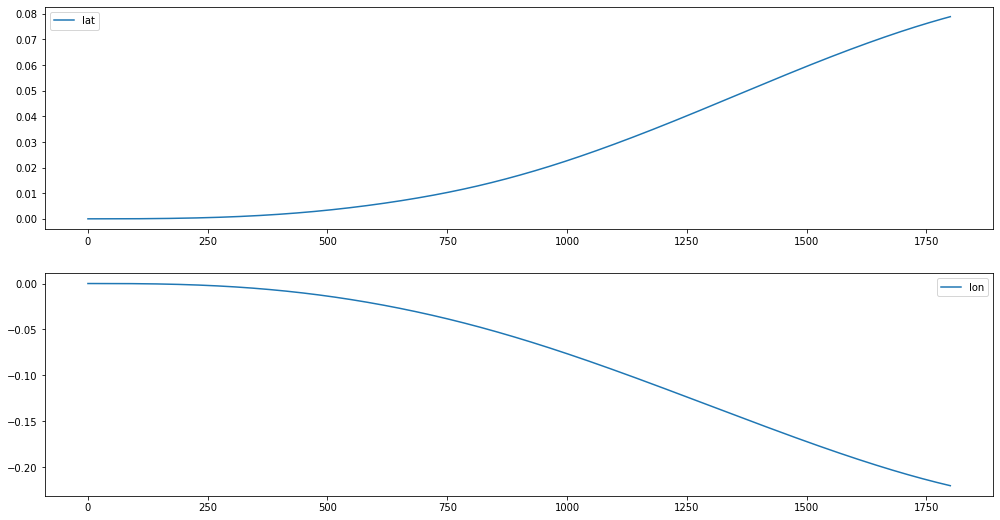

In [12]:
gyro_random_error_analysis.plots()

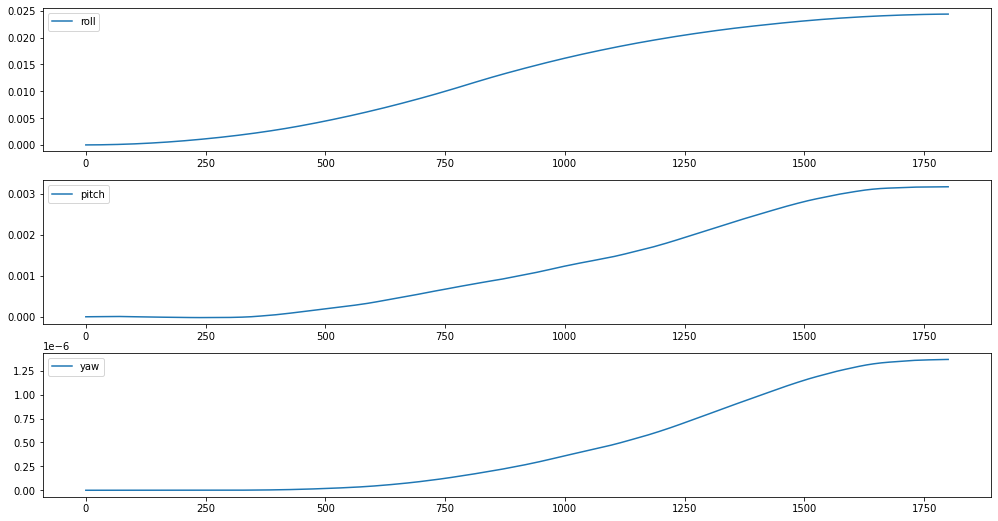

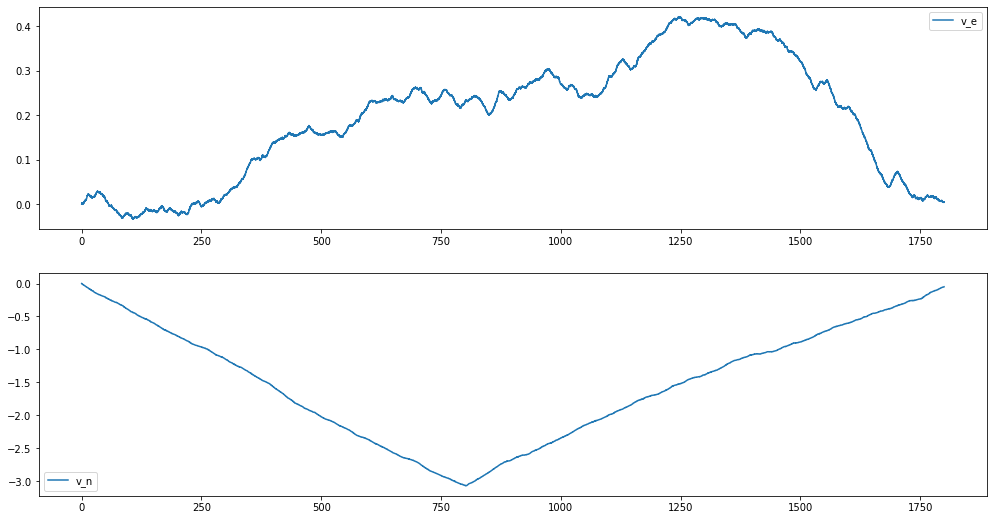

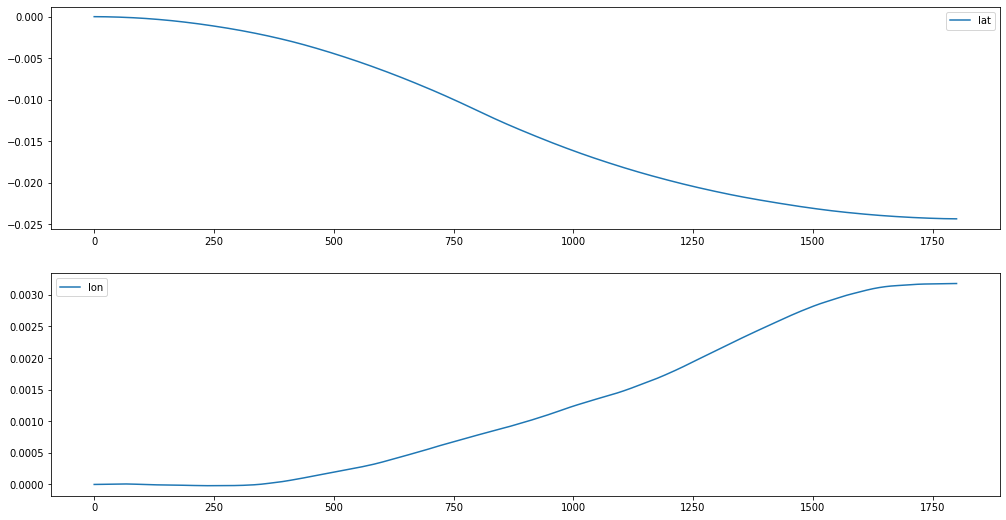

In [13]:
acc_random_error_analysis.plots()

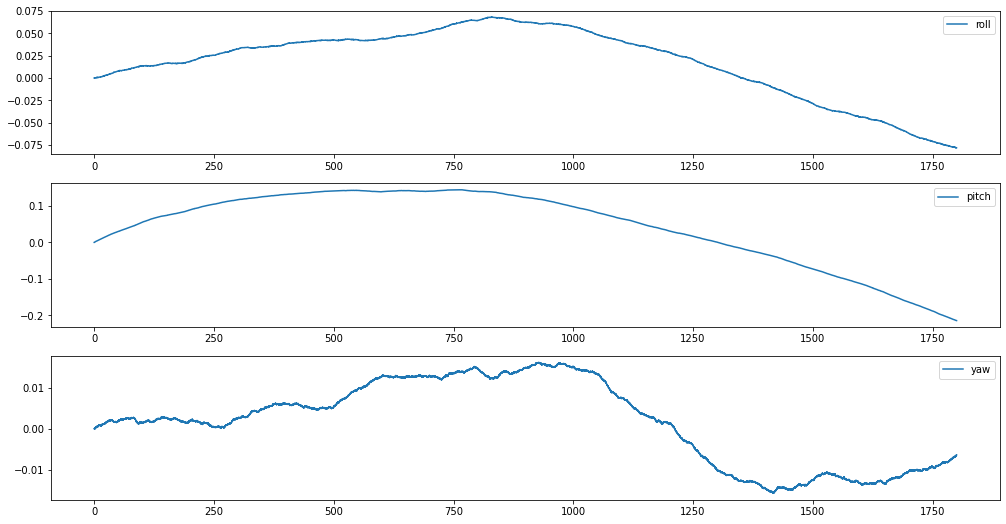

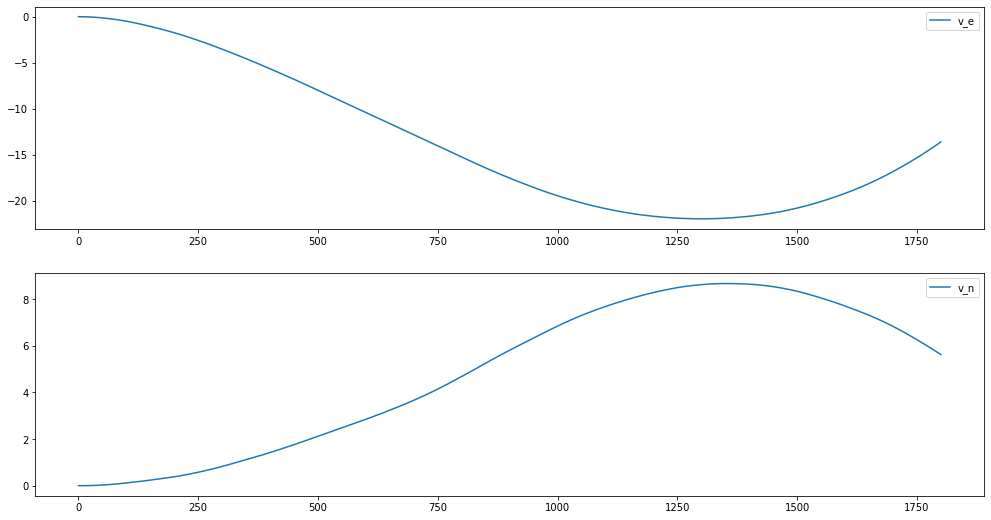

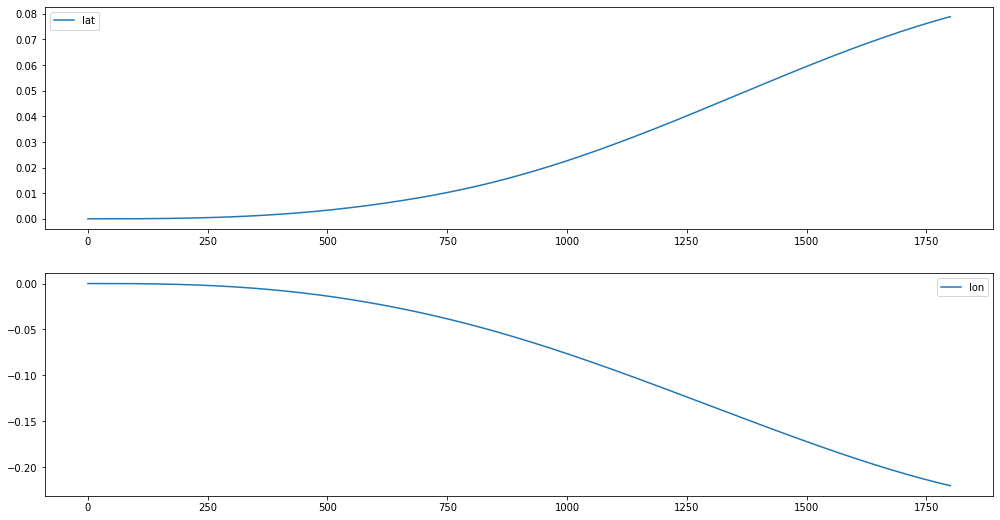

In [14]:
random_error_analysis.plots()